In [1]:
import os
print(os.getcwd())

path = os.chdir('E:/TIMA/VenturaBasinTiMA_Output')

print(os.getcwd())

# Import neccessary Python libraries

[python-ternary library introduction](https://github.com/marcharper/python-ternary)

In [59]:
# basic libraries
import pandas as pd
import numpy as np
import tqdm

# image processing libraries
import imageio
import cv2
import visvis as vv

# plotting libraries
from matplotlib import pyplot as plt
import matplotlib
import ternary #correct library is python-ternary

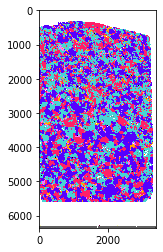

(<matplotlib.image.AxesImage at 0x1e681c2c6c8>, None)

In [31]:
%matplotlib inline
# !pip install opencv-python

img_path = r'E:/TIMA/VenturaBasinTiMA_Output/False_Color_Images_Thin_Sections/CC-17-GR_panorama_Legend_ThinSection.png'

img = imageio.imread(img_path)

# print(img.shape)
# vv.imshow(img)

plt.imshow(img), plt.show()

# 2 Data Visualization


#### 2.1 Mineral Associations Modal Abundances

- possibility of each mineral associated with selected mineral

The difference between modal abundances data and percentage grain per phase data is relatively small.


In [56]:
mineral_assoc_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_associations_modal abundances.csv'
mineral_associations = pd.read_csv(mineral_assoc_path)
print(mineral_associations.shape)
mineral_associations = mineral_associations.replace(r'----', np.nan)
# mineral_associations.iloc[1,1:].apply(pd.to_numeric)
mineral_associations
# max_value = mineral_assoc.idxmax(axis=1)
# max_value

(594, 31)


,Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Other Minerals,[Unclassified],Biotite-Ti,Clinochlore,Ankerite+clay
0,CC-17-1 - Liberation analysis #1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Quartz,NaN,19.90,23.55,12.12,18.56,20.57,20.03,24.25,3.58,...,0.00,10.13,8.08,3.37,5.60,25.23,8.51,11.91,0.00,100.00
2,Plagioclase,12.14,NaN,39.15,8.40,5.03,1.96,1.60,0.00,5.18,...,0.00,8.70,8.78,3.21,66.82,0.00,3.23,3.10,0.00,0.00
3,Orthoclase,13.15,22.36,NaN,7.62,5.08,2.85,1.85,0.88,0.45,...,0.00,0.00,4.48,0.00,0.78,0.00,2.04,2.85,0.00,0.00
4,Muscovite,0.96,17.10,3.17,NaN,10.63,19.61,0.00,0.66,0.00,...,0.00,0.81,2.66,0.00,6.79,0.00,1.11,1.85,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Clinochlore,0.01,0.00,0.00,2.98,0.01,0.21,0.00,0.10,0.00,...,0.00,0.00,0.00,0.00,0.16,0.00,0.02,0.00,NaN,0.00
590,Ankerite+clay,0.06,0.00,0.00,0.00,0.01,0.06,0.00,0.88,0.07,...,3.14,0.00,0.00,0.00,0.00,0.00,0.48,0.28,0.00,NaN
591,[Unclassified],4.31,6.21,1.27,1.01,1.37,13.89,4.82,2.27,19.09,...,7.25,18.89,46.47,0.75,1.24,0.00,NaN,2.86,20.20,29.06
592,Free particles,44.97,12.56,30.77,2.61,5.27,23.45,71.14,2.53,30.28,...,3.66,4.14,12.20,62.69,5.21,17.78,21.20,10.48,4.04,0.25


In [87]:
row_break = 33 # every sample only have 33 rows of data include sample name
mineral_assoc = pd.DataFrame(columns=['Sample ID', 'Mineral Name', 'Most Associated Mineral', 'Modal Abundances'])
for i in tqdm.trange(18):
    for j in range(1, 33):
        associated_min = pd.to_numeric(mineral_associations.iloc[i*row_break+1, 1:]).sort_values(ascending=False)
        most_assoc_min = associated_min[0]
        most_assoc_name = associated_min.index[0]
        mineral_assoc=mineral_assoc.append({'Sample ID': mineral_associations.iloc[i*row_break, 0], 
                              'Mineral Name': mineral_associations.iloc[i*row_break+j, 0],
                              'Most Associated Mineral': most_assoc_name,
                              'Modal Abundances': most_assoc_min}, ignore_index=True)
mineral_assoc.tail()
# slice 32 rows
# argmax() get column name 
# use legend  as one column, paired [] minerals as second/third column?

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:02<00:00,  6.79it/s]


,Sample ID,Mineral Name,Most Associated Mineral,Modal Abundances
571,MN-17-11 - Liberation analysis #1,Clinochlore,Sulfates,35.22
572,MN-17-11 - Liberation analysis #1,Ankerite+clay,Sulfates,35.22
573,MN-17-11 - Liberation analysis #1,[Unclassified],Sulfates,35.22
574,MN-17-11 - Liberation analysis #1,Free particles,Sulfates,35.22
575,MN-17-11 - Liberation analysis #1,Total,Sulfates,35.22


#### 2.2 Mineral Properties Modal Abundances

In [6]:
########################################################################
# read and pre-process mineral properties csv for each sample analyzed #
########################################################################

mineral_prop_path = r'E:/TIMA/VenturaBasinTiMA_Output/mineral_properties_modal_abundances.csv'
mineral_properties = pd.read_csv(mineral_prop_path)

# drop the first row (thin section #/name)

mineral_prop = mineral_properties.copy()[1:].T # transpose the dataframe for subsequent analysis.
mineral_prop.columns = mineral_prop.iloc[0] # use legend as column names
mineral_prop=mineral_prop.tail(-1) # drop the legend row since it is column name now
mineral_prop = mineral_prop.apply(pd.to_numeric) # because some numbers are in string type
mineral_prop['Feldspar'] = mineral_prop['Plagioclase']+mineral_prop['Orthoclase'] # feldspar sum up

# display to check
mineral_prop

Legend,Quartz,Plagioclase,Orthoclase,Muscovite,Biotite,Chlorite,Apatite,Pyroxene/Amphibole,Garnet,Epidote,...,Sulfates,Olivene,Other REE Minerals,Carbonates,Clay Minerals,Clinochlore,Ankerite+clay,[Unclassified],Total,Feldspar
CCR-18-1_Grain_Mount,7.9,6.0,2.8,0.1,0.5,0.3,3.7,3.4,7.1,13.7,...,0.0,0.0,0.9,0.0,0.0,0.0,0.2,0.3,100.0,8.8
MN16-03_Thin_Section,38.5,29.1,24.1,0.5,0.8,0.0,4.4,0.2,0.1,0.0,...,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.8,100.0,53.2
MN16-04_Thin_Section,38.9,32.6,20.8,1.6,3.1,0.1,0.2,0.8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.8,100.0,53.4
MN-16-04_Grain_Mount,5.8,2.9,1.1,0.7,2.3,2.5,11.0,0.0,8.4,0.2,...,0.2,0.0,1.1,0.0,0.0,0.0,0.0,0.3,100.0,4.0
EDF17-1_Thin_Section,38.7,28.6,24.5,0.9,2.6,0.0,0.2,0.3,0.1,0.0,...,0.0,0.0,0.0,0.0,2.4,0.0,0.0,1.0,100.0,53.1
EDF-17-1_Grain_Mount,17.0,7.1,6.7,0.7,1.1,1.6,31.7,0.0,11.4,0.1,...,0.0,0.0,1.2,0.0,0.3,0.0,0.0,0.5,100.0,13.8
MN17-11_Thin_Section,40.9,28.2,20.2,1.9,2.8,0.1,0.0,1.0,0.4,0.0,...,0.1,0.3,0.0,0.0,1.5,0.0,0.0,1.3,100.0,48.4
MN-17-11_Grain_Mount,2.3,0.9,0.7,0.2,0.7,1.2,0.5,0.0,3.5,0.4,...,0.0,0.0,0.5,0.0,0.0,0.0,0.1,0.2,100.0,1.6
MN-16-05_Thin_Section,3.4,9.9,1.2,0.4,0.9,0.6,4.6,2.1,3.6,33.1,...,0.0,0.0,0.1,0.0,0.1,0.2,0.1,1.0,100.0,11.1
MN16-05_Grain_Mount,12.9,58.9,10.2,0.9,3.0,0.4,0.5,7.5,0.2,2.3,...,0.0,0.1,0.0,0.0,0.2,0.2,0.0,0.9,100.0,69.1


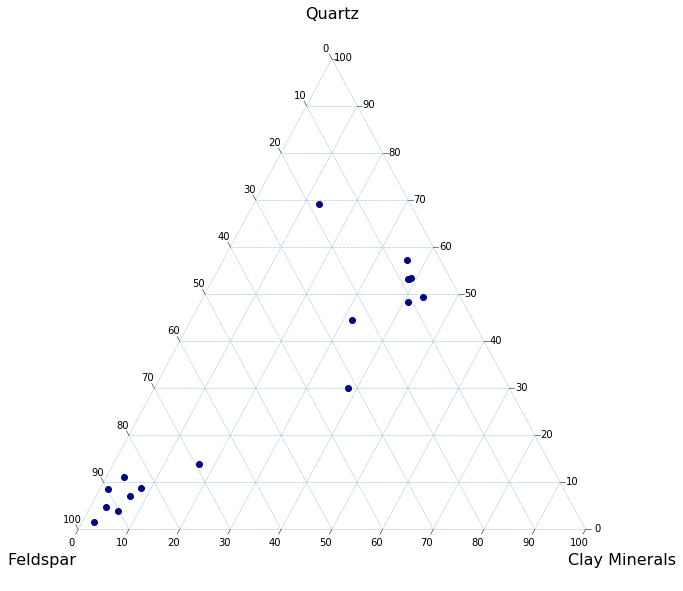

In [35]:
cols = ['Quartz', 'Feldspar', 'Clay Minerals'] # columns selected
fontsize = 16
###################################
## Ternary diagram
###################################
fig, tax = ternary.figure(scale=100)
fig.set_size_inches(10, 10)

tax.scatter(mineral_prop[cols].values, color='navy')


tax.gridlines(multiple=10) # tick interval
tax.get_axes().axis('off')
tax.ticks(axis='lbr', multiple=10, linewidth=0.5, offset=0.01, fontsize=10)
tax.right_corner_label("Clay Minerals", fontsize=fontsize)
tax.top_corner_label("Quartz", fontsize=fontsize)
tax.left_corner_label("Feldspar", fontsize=fontsize)